<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/TEGdehydration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Setting up the Colab page to use neqsim
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *

# TEG dehydration processes
A gas dehydration system is used by oil and gas producers to dehydrate natural gas into a state where it can be exported without risk of water condensation or hydrate formation downstream.

# Litterature

Wikipedia

https://en.wikipedia.org/wiki/Glycol_dehydration

https://blog.kimray.com/gas-dehydration-system-overview/


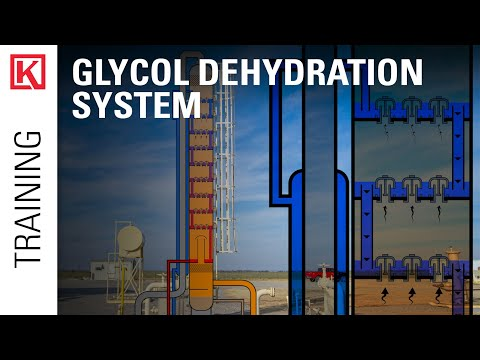

In [3]:
#@title Glycol dehydration video
#@markdown This video gives an intriduction to how a glycol process is designed
from IPython.display import YouTubeVideo
YouTubeVideo('HDBUS_ebFHQ', width=600, height=400)

# Estimation of water content of wet gas
In this example we will estimate the water content of a gas comming from a separator operating at 70 bara and 40C. The gas will be saturated at the operational conditions. NeqSim will use the CPA-EoS as thermodynamic model.



In [4]:
#Define a fluid composition and select thermodynamic model
components = ["water", "methane", "ethane", "propane", "i-butane", "n-butane", "i-pentane", "n-pentane", "n-hexane", "n-heptane", "n-octane", "n-nonane", "n-decane"]
moleFraction = [5.0, 80.35, 8.03, 5.02, 0.56, 0.9, 0.25, 0.24, 0.5, 0.3, 0.2, 0.1, 0.05] # units are mol/sec, we add some excess water
fluid1 = createfluid2(components, moleFraction, "mol/sec").autoSelectModel()

#Set the temperature and pressure of the fluid
fluid1.setPressure(70.0, "bara")
fluid1.setTemperature(40.0, "C")

#We run an equilibrium calculation at given temperature and pressure
TPflash(fluid1)

#Print results
print("Wet gas composition:")
printFrame(fluid1)
print("molar mass of gas ",fluid1.getPhase("gas").getMolarMass()*1e3, " [gr/mol]")
print("ppm water in wet gas ",fluid1.getPhase("gas").getComponent("water").getx()*1e6, " [mol/mol]")
print("water content of wet gas ",fluid1.getPhase("gas").getComponent("water").getNumberOfMolesInPhase()*fluid1.getPhase("gas").getComponent("water").getMolarMass()/(fluid1.getPhase("gas").getNumberOfMolesInPhase()*8.314*288.15/101325.0)*1e6, " kg water/MSm3")
print("water dew point temperature of wet gas ", (dewt(fluid1.phaseToSystem("gas"))-273.15), " [C]")
print("hydrate formation temperature of wet gas ", (hydt(fluid1.phaseToSystem("gas"))-273.15), " [C]")


Wet gas composition:
                          total                   gas                   oil               aqueous                   
              water  4.92854E-2            1.29422E-3            7.90183E-4            9.98803E-1    [mole fraction]
            methane  7.92016E-1            8.40199E-1            2.50024E-1            1.05624E-3    [mole fraction]
             ethane  7.91523E-2            8.31021E-2            8.63588E-2            1.19825E-4    [mole fraction]
            propane  4.94825E-2            5.08163E-2            1.34788E-1             1.6564E-5    [mole fraction]
           i-butane  5.51996E-3             5.5056E-3            2.66156E-2             1.9301E-6    [mole fraction]
           n-butane  8.87137E-3             8.6764E-3            5.49791E-2            1.86435E-6    [mole fraction]
          i-pentane  2.46427E-3            2.26608E-3            2.54962E-2            1.21287E-7    [mole fraction]
          n-pentane   2.3657E-3            

# Estimate equilibrium water content in gas for a lean TEG composition
Estimate the lean TEG concentration to reach a water dew point of -18C at 70 bara in methane. The operational temperature of the absorption column is 30C.

In [5]:
#Define a fluid composition and select thermodynamic model
components = ["methane", "water", "TEG"]
moleFraction = [1.0, 1.3, 98.7] #Define the TEG/water wt%, and add some excess methane 
fluid1 = createfluid2(components, moleFraction, "kg/sec").autoSelectModel()

#Set the temperature and pressure of the fluid
fluid1.setPressure(70.0, "bara")
fluid1.setTemperature(40.0, "C")

TPflash(fluid1)

#Print results
print("Dehydrated gas composition:")
printFrame(fluid1)
print("ppm water in dehydrated gas ",fluid1.getPhase("gas").getComponent("water").getx()*1e6)
print("water content of dehydrated gas ",fluid1.getPhase("gas").getComponent("water").getNumberOfMolesInPhase()*fluid1.getPhase("gas").getComponent("water").getMolarMass()/(fluid1.getPhase("gas").getNumberOfMolesInPhase()*8.314*288.15/101325.0)*1e6, " kg water/MSm3")
print("water dew point/hydrate formation temperature of dehydrated gas ", (hydt(fluid1.phaseToSystem("gas"))-273.15))
print("activity coefficient of water in lean TEG ",fluid1.getPhase("aqueous").getActivityCoefficient(1))

fluid1.setPressure(200.0, "bara")
print("hydrate formation temperature of dehydrated gas at ",fluid1.getPressure()," bara " , (hydt(fluid1.phaseToSystem("gas"))-273.15), " [C]")

Dehydrated gas composition:
                           total                   gas               aqueous                     
            methane   7.87297E-2            9.99918E-1            2.55355E-2      [mole fraction]
              water   9.11451E-2            8.13436E-5            9.64036E-2      [mole fraction]
                TEG   8.30125E-1             2.0113E-7            8.78061E-1      [mole fraction]
                                                                                                 
            Density                          4.70154E1             1.09883E3             [kg/m^3]
      PhaseFraction                         5.45927E-2            9.45407E-1      [mole fraction]
          MolarMass    1.27569E2             1.60432E1             1.34009E2            [kg/kmol]
           Z factor                         9.17406E-1            3.43589E-1                  [-]
 Heat Capacity (Cp)                          2.72364E0             2.28034E0            [k

# Example 18.3 from Campbell

Calculate the circulation rate of 98.7 wt% of lean TEG needed to dry 1 MSm3/day of gas at 70 bara and $40 ^{\circ}C$ in a six tray absorber (1.5 theoretical stages) to achieve a water content of 117 kg/MSm3. THe inlet gas is saturated with water (1100 kg water/MSm3).

## Calculate the circulation rate using the equiations from Campbell book

The following equiations will be used in the calculations:

$E_a=\frac{W_{N+1}-W_1}{W_{N+1}-W_0} = \frac{A^{N+1}-A}{A^{N+1}-1}$ (18.2) 

Where $W_N+1$ is the water content in (kg water/MSm3) in the feed gas (1100 kg/MSm3). $W_1$ is the water content in the dehydrated gas (117 kg/MSm3). A is the absorption factor calculates as A=L/VK. Where V and L is gas and liquid flow rate in mol/hr. K is the equilibrium constant.

$W_0$ is given by raults law and is calculated from: 

$W_0=W\cdot \gamma_{water} \cdot x_{water} $ (18.4)

Where $\gamma_{water}$ is the activity coefficient of water in lean TEG, and $x_{water}$ is the mol fraction of water in the lean TEG. From figure 18.7 we read at $40 ^{\circ}C$ and 98.7 wt% TEG: $\gamma_{water}=0.66$

$x_{water}=\frac{\frac{100-X_{gl}}{18}}{\frac{100-X_{gl}}{18}+\frac{X_gl}{150}}$

THe equilibrium constant for water is calculated from:

$K_{water}=\frac{y_{water}}{x_{water}}=\gamma \cdot \frac{P_{sat_water}}{P} = \gamma_{water} \cdot W_{sat}/B$

Where B is kg gas/MSm3 and is  calculated assuming a molar mass of about 20.0 gr/mol of gas.

$B=\frac{n}{V} \cdot M = \frac{P}{RT} \cdot M = \frac{101325}{8.314*288.15} \cdot 20.0 = 761000 \frac{kg}{MSm^3}$


In [6]:
GasFlowRate = 1.0 # MSm3/day
WNp1 = 1100.0 # kg water/MSm^3 (saturated at inlet)
W1 = 117.0 # kg water/MSm3
Np1 = 1.5 # Number of equilibrium stages
wtLeanTEG = 98.7
print("Number of equilibrium stages ",Np1)
x0 = (100.0-wtLeanTEG)/18.0/((100.0-wtLeanTEG)/18.0+wtLeanTEG/150.0) # mole fraction water in lean TEG
print("x0 " , x0, " [mol water/mol tot]")

gamma = 0.66 #activity coefficient of water in lean TEG

W0 = WNp1*gamma*x0 #water content in equilibrium with lean TEG
print("W0 " , W0," kg/MSm3")

Ea = (WNp1-W1)/(WNp1-W0) #absorption efficiency calulated from relative water removal from gas
print("Ea " , Ea," -")

## setting up a function to solve A 
def func(A):
        return (pow(A,Np1+1.0)-A)/(pow(A,Np1+1.0)-1.0)-Ea

from scipy.optimize import fsolve
solveA = fsolve(func, 0.1) # solve absorption factor using 0.1 as initial guess
A = solveA[0]
print('A ', A)
Ea2 = (pow(A,Np1+1.0)-A)/(pow(A,Np1+1.0)-1.0)
print("Ea2 " , Ea2," - ", " (should be same as Ea if solved correctly)")

VSm3hr = GasFlowRate*1e6/24.0 # MSm3/hr
molperm3 = 101325.0/8.314/288.15  #mol/Sm3
Vmolhr = VSm3hr*molperm3/1000.0 # mol/hr
print("V_mol/hr " , Vmolhr," kmol/hr")

B = 101325/(8.314*(273.15+40.0))*1e6 * 19.95/1000.0 #calculate B assuming molar mass of gas of 19.95 gr/mol
# in this case we use B from book
B = 761000.0

K = WNp1*gamma/B # Calculating equilibrium constant
print("K equilibrium constant water " , K," [-]")
Lmolhr =  A*Vmolhr*K
print("TEG mol/hr " , Lmolhr," kmol/hr")

molecularW = (1.0-x0)*150.0 + x0*18.0
print("molecularW" , molecularW," gr/mol")
massRateTEG = molecularW * Lmolhr
print("mass rate glycol " , massRateTEG," kg TEG/hr")

densityTEG = 1.12 #kg/liter


absRateWater = (WNp1-W1)/24.0
print("absorption rate water " , absRateWater," kg water/hr")

circRatio = massRateTEG/densityTEG/absRateWater
print("circulation ratio TEG/water " , circRatio," liter TEG/kg water")


Number of equilibrium stages  1.5
x0  0.09890444309190485  [mol water/mol tot]
W0  71.80462568472292  kg/MSm3
Ea  0.9560439820638419  -
A  7.312899327464227
Ea2  0.9560439820638403  -   (should be same as Ea if solved correctly)
V_mol/hr  1762.2873614416887  kmol/hr
K equilibrium constant water  0.0009540078843626807  [-]
TEG mol/hr  12.294709886685112  kmol/hr
molecularW 136.94461351186857  gr/mol
mass rate glycol  1683.694293672642  kg TEG/hr
absorption rate water  40.958333333333336  kg water/hr
circulation ratio TEG/water  36.703116414895554  liter TEG/kg water
